# Project Code

In [109]:
import pandas as pd

In [110]:
memory_df = pd.read_csv('hippoCorpusV2.csv')

In [3]:
concreteness = pd.read_excel('concreteness.xlsx')
concreteness

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
0,roadsweeper,0,4.85,0.37,1,27,0.962963,0,0
1,traindriver,0,4.54,0.71,3,29,0.896552,0,0
2,tush,0,4.45,1.01,3,25,0.880000,66,0
3,hairdress,0,3.93,1.28,0,29,1.000000,1,0
4,pharmaceutics,0,3.77,1.41,4,26,0.846154,0,0
...,...,...,...,...,...,...,...,...,...
39949,unenvied,0,1.21,0.62,1,30,0.966667,0,NaN
39950,agnostically,0,1.20,0.50,2,27,0.925926,0,NaN
39951,conceptualistic,0,1.18,0.50,4,26,0.846154,0,NaN
39952,conventionalism,0,1.18,0.48,1,29,0.965517,0,NaN


### Prepping the data to merge for retold stories

In [4]:
mask1 = memory_df['memType'] == 'recalled'
mask2 = memory_df['memType'] == 'imagined'
retold_imagined = memory_df[mask1 | mask2].copy()

In [5]:
retold_imagined["target"] = retold_imagined["memType"].apply(lambda x: 1 if x  == 'imagined' else 0)

In [6]:
retold_imagined.iloc[3000]['story']

"In May I ran the science olympiad at school after months of organization. I was the only one working on it despite the fact that they added additional grade levels to the event. It had originally just been fifth and sixth grade, but this most recent year they added third and fourth grade in as well. This made it more challenging because being younger, they are obviously at a different stage of development than fifth and sixth graders. Organizing academic events, including engineering-related and computer science-related events that would work across all grade levels added to the challenge. Plus, I was organizing it all by myself. So I had to come up with the list of events, buy and organize all of the supplies, create and write all the directions, and organize all the teams across grade levels in a balanced fashion. The latter was probably the most challenging part because I don't know all of the grade levels, and so I don't know the kids very well, and their teachers weren't overly h

In [7]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize('Eighty-seven miles to go, yet.  Onward!')

['Eighty', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

In [8]:
def clean_up_sentence(string):
    # tokenization & removing any characater that is not of the alphabet
    X_list = word_tokenize(string.lower()) 
    X_list = [word for word in X_list if word.isalpha()]

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    
    # remove stop words from the string 
    X_list = [w for w in X_list if not w in sw]  
   
    # lemmetize each word in the string.
    lem = WordNetLemmatizer()
    
    X_list = [lem.lemmatize(w) for w in X_list]
    X_list = [lem.lemmatize(w, pos="a") for w in X_list]
    X_list = [lem.lemmatize(w, pos="v") for w in X_list]
    return X_list

retold_imagined['story_token'] = retold_imagined['story'].apply(clean_up_sentence)
retold_imagined['summary_token'] = retold_imagined['summary'].apply(clean_up_sentence)
retold_imagined['mainEvent_token'] = retold_imagined['mainEvent'].apply(clean_up_sentence)

In [9]:
retold_imagined

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,similarity,similarityReason,story,stressful,summary,timeSinceEvent,target,story_token,summary_token,mainEvent_token
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,3.0,"I've been to a couple concerts, but not many.","Concerts are my most favorite thing, and my bo...",1.0,My boyfriend and I went to a concert together ...,90.0,1,"[concert, favorite, thing, boyfriend, know, an...","[boyfriend, go, concert, together, great, time...","[attend, show]"
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,NaN,NaN,"The day started perfectly, with a great drive ...",1.0,My boyfriend and I went to a concert together ...,90.0,0,"[day, start, perfectly, great, drive, denver, ...","[boyfriend, go, concert, together, great, time...",[concert]
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,3.0,I am a mother myself,It seems just like yesterday but today makes f...,1.0,My sister gave birth to my twin niece and neph...,150.0,1,"[seem, like, yesterday, today, make, five, mon...","[sister, give, birth, twin, niece, nephew, vis...","[sister, twin, little, early]"
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,NaN,NaN,"Five months ago, my niece and nephew were born...",2.0,My sister gave birth to my twin niece and neph...,150.0,0,"[five, month, ago, niece, nephew, bear, sister...","[sister, give, birth, twin, niece, nephew, vis...","[meet, twin, niece, nephew]"
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,4.0,Because I also have money problems,About a month ago I went to burning man. I was...,4.0,It is always a journey for me to go to burning...,30.0,1,"[month, ago, go, burn, man, hard, time, life, ...","[always, journey, go, burn, man, hard, time, c...","[consequence, go, burn, man]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,926,KVSO6L8P,30.0,woman,other,3.0,5.0,3.0,5.0,...,NaN,NaN,My dog was diagnosed with lymphoma a year ago ...,5.0,"My dog, who had lymphoma, was suffering so I h...",150.0,0,"[dog, diagnose, lymphoma, year, ago, chemother...","[dog, lymphoma, suffer, make, hard, unselfish,...","[lose, find, pet]"
6850,39PAAFCODNMWRITC4CBO6VRL6O4TV3,3044,QJB7AXPP,18.0,woman,asian,4.0,2.0,4.0,2.0,...,NaN,NaN,"Over my vacation from my job, I went to Casper...",5.0,"On vacation, a side job was taken to plan an e...",570.0,0,"[vacation, job, go, casper, take, side, job, l...","[vacation, side, job, take, plan, event, would...","[vacation, event, work]"
6851,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,1008,IJP8D12L,35.0,man,asian,1.0,2.0,2.0,4.0,...,NaN,NaN,This event was a birthday party for my nephew....,2.0,This was a birthday party for my nephew that h...,21.0,0,"[event, birthday, party, nephew, turn, five, g...","[birthday, party, nephew, happen, recently, op...","[nephew, birthday, party]"
6852,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,1462,LCKEHYRF,30.0,man,hisp,1.0,1.0,3.0,3.0,...,NaN,NaN,This event occurred about two weeks ago. I was...,2.0,It was my little cousin's birthday and went to...,14.0,0,"[event, occur, two, week, ago, go, shop, birth...","[little, cousin, birthday, go, choose, present...","[cousin, birthday]"


In [10]:
from collections import Counter
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import numpy as np

def sentiment_anal(summary, story):
    avg_score = 0
    num = 0
    def once(review, ori1, ori2):
    #     print(ori1, ori2)
        startpos = ori1-2 if ori1-2 > 0 else 0
        endpos = ori2+2 if ori2+2 < len(review)-1 else len(review)-1
        sentence = review[startpos: endpos+1]
        sentence_s = " ".join(sentence)
    #     print(sentence_s)
        return sid.polarity_scores(sentence_s)["compound"]

    for number in range(len(summary)):
        if summary[number] in story:
            num += 1
            count = [i for i, n in enumerate(story) if n == summary[number]]
            avg_score += once(story, count[0], count[-1])
    if num != 0:
        return avg_score/num
    else:
        return 0


sentiment_summary = []
for x in range(len(retold_imagined)):
    sentiment_summary.append(sentiment_anal(retold_imagined.iloc[x]["summary_token"],
                                               retold_imagined.iloc[x]["story_token"]))

In [11]:
retold_imagined['sentiment_summary'] = sentiment_summary

sentiment_mainEvent = []
for x in range(len(retold_imagined)):
    sentiment_mainEvent.append(sentiment_anal(retold_imagined.iloc[x]["mainEvent_token"],
                                               retold_imagined.iloc[x]["story_token"]))
retold_imagined['sentiment_mainEvent'] = sentiment_mainEvent

In [12]:
retold_imagined['total_word_count'] = retold_imagined['story'].apply(lambda x: len(x))

In [13]:
retold_imagined['remove_stop_word_count'] = retold_imagined['story_token'].apply(lambda x: len(x))    

In [37]:
concrete_dict = concreteness[['Word', 'Conc.M']].set_index('Word').to_dict()['Conc.M']

In [38]:
def concrete(wlist):
    score = 0
    count = 0
    for word in wlist:
        if word in concrete_dict:
            score += concrete_dict.get(word)
            count += 1
    if count > 0:
        return score/count
    else:
        return 0

con = []
for x in range(len(retold_imagined)):
    con.append(concrete(retold_imagined.iloc[x]['story_token']))
retold_imagined["concreteness"] = con

In [39]:
retold_imagined

,AssignmentId,WorkTimeInSeconds,WorkerId,annotatorAge,annotatorGender,annotatorRace,distracted,draining,frequency,importance,...,timeSinceEvent,target,story_token,summary_token,mainEvent_token,sentiment_summary,sentiment_mainEvent,total_word_count,remove_stop_word_count,concreteness
0,32RIADZISTQWI5XIVG5BN0VMYFRS4U,1641,XI8VK89S,25.0,man,white,1.0,1.0,NaN,3.0,...,90.0,1,"[concert, favorite, thing, boyfriend, know, an...","[boyfriend, go, concert, together, great, time...","[attend, show]",0.831325,0.636900,1059,84,3.076145
1,3018Q3ZVOJCZJFDMPSFXATCQ4DARA2,1245,1HN5ZZ1D,25.0,woman,white,1.0,1.0,3.0,4.0,...,90.0,0,"[day, start, perfectly, great, drive, denver, ...","[boyfriend, go, concert, together, great, time...",[concert],0.684933,0.000000,902,72,3.388406
2,3IRIK4HM3B6UQBC0HI8Q5TBJZLEC61,1159,8SBPL7EI,35.0,woman,black,1.0,1.0,NaN,4.0,...,150.0,1,"[seem, like, yesterday, today, make, five, mon...","[sister, give, birth, twin, niece, nephew, vis...","[sister, twin, little, early]",0.189917,0.458000,1330,119,3.108261
3,3018Q3ZVOJCZJFDMPSFXATCQG04RAI,500,M1QQED2V,30.0,woman,white,1.0,4.0,3.0,5.0,...,150.0,0,"[five, month, ago, niece, nephew, bear, sister...","[sister, give, birth, twin, niece, nephew, vis...","[meet, twin, niece, nephew]",0.365200,0.340533,876,71,3.086620
4,3MTMREQS4W44RBU8OMP3XSK8NMJAWZ,1074,DU3RPZDB,25.0,man,white,2.0,2.0,NaN,3.0,...,30.0,1,"[month, ago, go, burn, man, hard, time, life, ...","[always, journey, go, burn, man, hard, time, c...","[consequence, go, burn, man]",0.327831,0.402033,783,78,2.983247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,3SKEMFQBZ4RZDN7C2AMMDQKHCV68K1,926,KVSO6L8P,30.0,woman,other,3.0,5.0,3.0,5.0,...,150.0,0,"[dog, diagnose, lymphoma, year, ago, chemother...","[dog, lymphoma, suffer, make, hard, unselfish,...","[lose, find, pet]",-0.073200,-0.530800,1474,120,3.127288
6850,39PAAFCODNMWRITC4CBO6VRL6O4TV3,3044,QJB7AXPP,18.0,woman,asian,4.0,2.0,4.0,2.0,...,570.0,0,"[vacation, job, go, casper, take, side, job, l...","[vacation, side, job, take, plan, event, would...","[vacation, event, work]",-0.037440,0.285950,1593,143,3.386901
6851,3FE2ERCCZYU396R8MJGQ6TWGLSMOPR,1008,IJP8D12L,35.0,man,asian,1.0,2.0,2.0,4.0,...,21.0,0,"[event, birthday, party, nephew, turn, five, g...","[birthday, party, nephew, happen, recently, op...","[nephew, birthday, party]",0.618990,0.794567,845,69,3.300882
6852,3J88R45B2HKQ3F50NA3MP6N9XXKPXS,1462,LCKEHYRF,30.0,man,hisp,1.0,1.0,3.0,3.0,...,14.0,0,"[event, occur, two, week, ago, go, shop, birth...","[little, cousin, birthday, go, choose, present...","[cousin, birthday]",0.426145,0.745400,1773,142,2.977887


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def similarity(tmp, list_of_words):
    attribute = ", ".join(tmp)
    string = ", ".join(list_of_words)
    documents = [attribute, string]
    count_vectorizer = CountVectorizer()
    count_matrix = count_vectorizer.fit_transform(documents)
    return cosine_similarity(count_matrix[0:1], count_matrix)[0][1]

summary_sim = []
for x in range(len(retold_imagined)):
    summary_sim.append(similarity(retold_imagined.iloc[x]['summary_token'],
                                            retold_imagined.iloc[x]['story_token']))
retold_imagined["summary_sim"] = summary_sim

In [41]:
mainEvent_sim = []
for x in range(len(retold_imagined)):
    mainEvent_sim.append(similarity(retold_imagined.iloc[x]['mainEvent_token'],
                                            retold_imagined.iloc[x]['story_token']))
retold_imagined["mainEvent_sim"] = summary_sim

In [42]:
analysis_df = retold_imagined[["target", "sentiment_summary", "sentiment_mainEvent", "total_word_count", "remove_stop_word_count",
                    "summary_sim", "mainEvent_sim", "concreteness"]].copy()

In [83]:
analysis_df

,target,sentiment_summary,sentiment_mainEvent,total_word_count,remove_stop_word_count,summary_sim,mainEvent_sim,concreteness
0,1,0.831325,0.636900,1059,84,0.189194,0.189194,3.076145
1,0,0.684933,0.000000,902,72,0.189258,0.189258,3.388406
2,1,0.189917,0.458000,1330,119,0.190416,0.190416,3.108261
3,0,0.365200,0.340533,876,71,0.483494,0.483494,3.086620
4,1,0.327831,0.402033,783,78,0.474693,0.474693,2.983247
...,...,...,...,...,...,...,...,...
6849,0,-0.073200,-0.530800,1474,120,0.230783,0.230783,3.127288
6850,0,-0.037440,0.285950,1593,143,0.406455,0.406455,3.386901
6851,0,0.618990,0.794567,845,69,0.403162,0.403162,3.300882
6852,0,0.426145,0.745400,1773,142,0.341743,0.341743,2.977887


In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

y = analysis_df['target'].values
X = analysis_df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

clf = MLPClassifier().fit(X_train, y_train)

random_state = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)]
max_iter = [int(x) for x in np.linspace(300, 1000, num = 3)]
learning_rate = ['constant']
activation = ['logistic']
hidden_layer_size = [(100,), (200,),(150,)]
# Create the random grid
parameters = {'random_state': random_state,
               'max_iter': max_iter,
               'learning_rate': learning_rate,
               'activation': activation,
               'hidden_layer_size': hidden_layer_size
                 }

gs = GridSearchCV(clf, parameters).fit(X_test, y_test)
gs.best_params_

# clf.score(X_test,y_test)
# clf.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1])

In [148]:
clf = MLPClassifier().fit(X_train, y_train)
print("The MLP Classifier has an accuracy score of", clf.score(X_test, y_test))

The MLP Classifier has an accuracy score of 0.6076589595375722


In [130]:
gs.best_params_

{'max_iter': 300, 'penalty': 'l2', 'random_state': 10}

In [131]:
gs.best_score_

0.6293439020561922

In [78]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=10, max_iter=100).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.6091040462427746


In [97]:
gs.cv_results_

{'mean_fit_time': array([0.29027662, 0.23885703, 0.29722185, 0.24158921, 0.34837623,
        0.27767782, 0.25696259, 0.50940623, 0.27470603, 0.36590977,
        0.41952043, 0.38313465, 0.33713593, 0.60346608, 0.45527363,
        0.43215628, 0.68382778, 0.55687065, 0.36846228, 0.30362616,
        0.26797204, 0.39833364, 0.33532853, 0.27106266, 0.32007079,
        0.3040688 , 0.25851016]),
 'std_fit_time': array([0.10613559, 0.09898887, 0.0766954 , 0.08484444, 0.26499257,
        0.03626332, 0.04323028, 0.2453533 , 0.03261584, 0.15559591,
        0.06255268, 0.07054195, 0.16636624, 0.10493687, 0.18109309,
        0.1826489 , 0.32063485, 0.21812291, 0.1273026 , 0.08286551,
        0.06054529, 0.19208374, 0.11605262, 0.06339771, 0.09881198,
        0.06307877, 0.0588988 ]),
 'mean_score_time': array([0.00151935, 0.0017314 , 0.0017673 , 0.00143423, 0.00152249,
        0.00144   , 0.00273633, 0.00198507, 0.00145254, 0.00209241,
        0.00177193, 0.00187039, 0.00184846, 0.00757699, 0.002437

In [ ]:
mask1 = memory_df['AssignmentId'] == memory_df['recAgnPairId']

In [ ]:
retold_recall = memory_df[~mask1].copy()

In [ ]:
retold_table = memory_df.merge(retold_recall, left_on='AssignmentId', right_on='recAgnPairId', suffixes=['_1st','_2nd'])

### Prepping the data to merge for Imagined stories 

In [ ]:
mask = memory_df['AssignmentId'] == memory_df['recImgPairId']

In [ ]:
imagined_recall = memory_df[~mask].copy()

### Creating new table that merges on the ID values

In [ ]:
imagined_table = memory_df.merge(imagined_recall, left_on='AssignmentId', right_on='recImgPairId', suffixes=['_1st','_2nd'])


In [ ]:
imagined_table[['story_1st','story_2nd']]

In [ ]:
imagined_table["similarity_2nd"].value_counts()

### Analysis

**TF_IDF Analysis for imagined_table**

In [ ]:
ori_story_wordlist = []
recall_story_wordlist = []

for x in range(len(imagined_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X = imagined_table.iloc[x]['story_1st']
    Y = imagined_table.iloc[x]['story_2nd']

    # tokenization & removing any characater that is not of the alphabet
    X_list = word_tokenize(X.lower()) 
    X_list = [word for word in X_list if word.isalpha()]

    Y_list = word_tokenize(Y.lower()) 
    Y_list = [word for word in Y_list if word.isalpha()]


    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    L1 =[];l2 =[] 

    # remove stop words from the string 
    X_list = [w for w in X_list if not w in sw]  
    Y_list = [w for w in Y_list if not w in sw]
    
    # lemmetize each word in the string.
    lem = WordNetLemmatizer()
    
    X_list = [lem.lemmatize(w) for w in X_list]
    X_list = [lem.lemmatize(w, pos="a") for w in X_list]
    X_list = [lem.lemmatize(w, pos="v") for w in X_list]
    
    Y_list = [lem.lemmatize(w) for w in Y_list]
    Y_list = [lem.lemmatize(w, pos="a") for w in Y_list]
    Y_list = [lem.lemmatize(w, pos="v") for w in Y_list]
    
    ori_story_wordlist.append(' '.join(X_list))
    recall_story_wordlist.append(' '.join(Y_list))
    # count the occurance of each word in the paragraph (Term frequencies)
#     DF = {}
#     DF2 = {}
#     for w in X_list:
#         try:
#             DF[w].add(w)
#         except:
#             DF[w] = {w}
            
#     for w in Y_list:
#         try:
#             DF2[w].add(w)
#         except:
#             DF2[w] = {w}    


In [ ]:
# imagined_table["ori_story"] = ori_story_wordlist
# imagined_table["recall_story"] = recall_story_wordlist

# imagined_table

In [ ]:
# imagine_age_story = imagined_table[["recall_story", "annotatorAge_2nd"]].groupby("annotatorAge_2nd", as_index=False).sum()

# imagine_age_story

In [ ]:
# def freq(string):
#     words = []
#     words = string.split()
#     wfreq=[words.count(w) for w in words]
#     print (dict(zip(words,wfreq)))

# imagine_age_story["freq"] = imagine_age_story["recall_story"].apply(freq)

In [ ]:
# imagine_age_story

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(imagined_table["ori_story"])
# word = vectorizer.get_feature_names()
# # print(word)
# # print (X.toarray())
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
# # print(transformer)
# tfidf = transformer.fit_transform(X)

In [ ]:
# tfidf

In [ ]:
# len(imagined_table)

**Below takes each word and returns the occurance of that word in each paragraph**
<br>**The TF we see here is for the last paragraph for the original story and the retold story**

In [ ]:
# for i in DF:
#     DF[i] = len(DF[i])

In [ ]:
# for i in DF2:
#     DF2[i] = len(DF2[i])

In [ ]:
# DF2

**similarity score for imagined_table**

In [ ]:
similarityscore = []

for x in range(len(imagined_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =imagined_table.iloc[x]['story_1st']
    Y =imagined_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)

similarityscore

In [ ]:
imagined_table["similarityscore"] = similarityscore

**similarity score for retold table**

In [ ]:
similarityscore = []

for x in range(len(retold_table)):
    # X = input("Enter first string: ").lower() 
    # Y = input("Enter second string: ").lower() 
    X =retold_table.iloc[x]['story_1st']
    Y =retold_table.iloc[x]['story_2nd']

    # tokenization 
    X_list = word_tokenize(X)  
    Y_list = word_tokenize(Y) 

    # sw contains the list of stopwords 
    sw = stopwords.words('english')  
    l1 =[];l2 =[] 

    # remove stop words from the string 
    X_set = {w for w in X_list if not w in sw}  
    Y_set = {w for w in Y_list if not w in sw} 

    # form a set containing keywords of both strings  
    rvector = X_set.union(Y_set)  
    for w in rvector: 
        if w in X_set: l1.append(1) # create a vector 
        else: l1.append(0) 
        if w in Y_set: l2.append(1) 
        else: l2.append(0) 
    c = 0

    # cosine formula  
    for i in range(len(rvector)): 
            c+= l1[i]*l2[i] 
    cosine = c / float((sum(l1)*sum(l2))**0.5) 
    similarityscore.append(cosine)

similarityscore

In [ ]:
retold_table["similarityscore"] = similarityscore

**linear regression for retold_table (doesn't have similarity)**

In [ ]:
retold_linear = retold_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","frequency_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()

In [ ]:
retold_linear.dropna(how="any", inplace=True)

In [ ]:
retold_linear_regr = pd.get_dummies(retold_linear)

In [ ]:
retold_linear_regr

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (train_test_split,KFold)
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import glob
from sklearn.linear_model import LinearRegression

y = retold_linear_regr['similarityscore'].values
X = retold_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_train, regr.predict(X_train)))
print(mean_squared_error(y_test, regr.predict(X_test)))

**for imagined story (doesn't have frequency)**

In [ ]:
imagined_linear = imagined_table[["WorkTimeInSeconds_2nd", "annotatorAge_2nd","annotatorGender_2nd","annotatorRace_2nd", "distracted_2nd",
              "draining_2nd","importance_2nd","logTimeSinceEvent_2nd","openness_2nd", "similarity_2nd",
              "stressful_2nd","timeSinceEvent_2nd","similarityscore"]].copy()
imagined_linear.dropna(how="any", inplace=True)
imagined_linear_regr = pd.get_dummies(imagined_linear)

y = imagined_linear_regr['similarityscore'].values
X = imagined_linear_regr.drop(['similarityscore'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)
regr = LinearRegression().fit(X_train, y_train)
print(mean_squared_error(y_train, regr.predict(X_train)))
print(mean_squared_error(y_test, regr.predict(X_test)))


These are the columns in the file:
- `AssignmentId`: Unique ID of this story
- `WorkTimeInSeconds`: Time in seconds that it took the worker to do the entire HIT (reading instructions, storywriting, questions)
- `WorkerId`: Unique ID of the worker (random string, not MTurk worker ID)
- `annotatorAge`: Lower limit of the age bucket of the worker. Buckets are: 18-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55+
- `annotatorGender`: Gender of the worker
- `annotatorRace`: Race/ethnicity of the worker
- `distracted`: How distracted were you while writing your story? (5-point Likert)
- `draining`: How taxing/draining was writing for you emotionally? (5-point Likert)
- `frequency`: How often do you think about or talk about this event? (5-point Likert)
- `importance`: How impactful, important, or personal is this story/this event to you? (5-point Likert)
- `logTimeSinceEvent`: Log of time (days) since the recalled event happened
- `mainEvent`: Short phrase describing the main event described
- `memType`: Type of story (recalled, imagined, retold)
- `mostSurprising`: Short phrase describing what the most surpring aspect of the story was
- `openness`: Continuous variable representing the openness to experience of the worker
- `recAgnPairId`: ID of the recalled story that corresponds to this retold story (null for imagined stories). Group on this variable to get the recalled-retold pairs.
- `recImgPairId`: ID of the recalled story that corresponds to this imagined story (null for retold stories). Group on this variable to get the recalled-imagined pairs.
- `similarity`: How similar to your life does this event/story feel to you? (5-point Likert)
- `similarityReason`: Free text annotation of similarity
- `story`: Story about the imagined or recalled event (15-25 sentences)
- `stressful`: How stressful was this writing task? (5-point Likert)
- `summary`: Summary of the events in the story (1-3 sentences)
- `timeSinceEvent`: Time (num. days) since the recalled event happened

**the average similarity score between age groups for retold**

In [ ]:
retold_table[["annotatorAge_2nd", "similarityscore"]].groupby("annotatorAge_2nd").mean().plot()

**average time that it took each age group for retold**

In [ ]:
retold_table[["annotatorAge_2nd", "WorkTimeInSeconds_2nd"]].groupby("annotatorAge_2nd").mean().plot()

**the average similarity score between age groups for imagined**

In [ ]:
imagined_table[["annotatorAge_2nd", "similarityscore"]].groupby("annotatorAge_2nd").mean().plot()

**average time that it took each age group for imagined**

In [ ]:
imagined_table[["annotatorAge_2nd", "WorkTimeInSeconds_2nd"]].groupby("annotatorAge_2nd").mean().plot()

**LDA tags and see if there are themes that are being remembered more**

In [ ]:
retold_recall

In [100]:
from sklearn.metrics import roc_auc_score

dtc = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
print("The accuracy score for Decision Tree Clssifier is", dtc.score(X_test, y_test))
print("The roc score for Decision Tree Clssifier is", roc_auc_score(y_test, dtc.predict(X_test)))

ltc = LogisticRegression(random_state=10, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print("The accuracy score for Logistic Regression Clssifier is", ltc.score(X_test, y_test))
print("The roc score for Logistic Regression Clssifier is", roc_auc_score(y_test, ltc.predict(X_test)))


The accuracy score for Decision Tree Clssifier is 0.5487804878048781
The roc score for Decision Tree Clssifier is 0.5488317190739926
The accuracy score for Logistic Regression Clssifier is 0.6043360433604336
The roc score for Logistic Regression Clssifier is 0.6043178207213287


In [101]:
from sklearn.ensemble import BaggingClassifier

bag1 = BaggingClassifier(base_estimator=dtc, n_estimators=50, random_state=10).fit(X_train, y_train)
print("The accuracy score for Decision Tree Clssifier with Bagging is", bag1.score(X_test, y_test))
print("The roc score for Decision Tree Clssifier with Bagging is", roc_auc_score(y_test, bag1.predict(X_test)))

bag2 = BaggingClassifier(base_estimator=ltc, n_estimators=50, random_state=10).fit(X_train, y_train)
print("The accuracy score for Logistic Regression Clssifier with Bagging is", bag2.score(X_test, y_test))
print("The roc score for Logistic Regression Clssifier with Bagging is", roc_auc_score(y_test, bag2.predict(X_test)))


The accuracy score for Decision Tree Clssifier with Bagging is 0.5745257452574526
The roc score for Decision Tree Clssifier with Bagging is 0.5748563976977933
The accuracy score for Logistic Regression Clssifier with Bagging is 0.6052393857271906
The roc score for Logistic Regression Clssifier with Bagging is 0.6052277031873632


In [102]:
rfc = RandomForestClassifier().fit(X_train, y_train)
print("The accuracy score for Random Forest Clssifier is", rfc.score(X_test, y_test))
print("The roc score for Random Forest Clssifier is", roc_auc_score(y_test, rfc.predict(X_test)))


The accuracy score for Random Forest Clssifier is 0.580397470641373
The roc score for Random Forest Clssifier is 0.5806351714047199


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("The accuracy score for Gradient Boosting Clssifier is", gbc.score(X_test, y_test))
print("The roc score for Gradient Boosting Clssifier is", roc_auc_score(y_test, gbc.predict(X_test)))


The accuracy score for Gradient Boosting Clssifier is 0.5885275519421861
The roc score for Gradient Boosting Clssifier is 0.5887914720755847


In [105]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier().fit(X_train, y_train)
print("The accuracy score for Gradient Boosting Clssifier is", abc.score(X_test, y_test))
print("The roc score for Gradient Boosting Clssifier is", roc_auc_score(y_test, abc.predict(X_test)))


The accuracy score for Gradient Boosting Clssifier is 0.580397470641373
The roc score for Gradient Boosting Clssifier is 0.5806612846234759


In [113]:
clf = DecisionTreeClassifier(random_state=10).fit(X_train, y_train)
print(clf.feature_importances_)
print(X.columns)

[0.16030508 0.15745768 0.19439782 0.10738423 0.09759696 0.13940914
 0.14344909]
Index(['sentiment_summary', 'sentiment_mainEvent', 'total_word_count',
       'remove_stop_word_count', 'summary_sim', 'mainEvent_sim',
       'concreteness'],
      dtype='object')


In [152]:
X_train_sub = X_train[["total_word_count", "sentiment_summary"]]
X_test_sub = X_test[["total_word_count", "sentiment_summary"]]

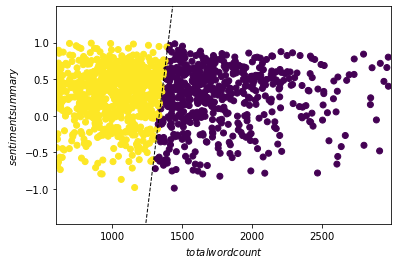

In [157]:
clf = LogisticRegression(random_state=0, C=10).fit(X_train_sub, y_train)
y_test = clf.predict(X_test_sub)

xmin, xmax = X_train_sub.iloc[:, 0].min() - .5, X_train_sub.iloc[:, 0].max() + .5
ymin, ymax = X_train_sub.iloc[:, 1].min() - .5, X_train_sub.iloc[:, 1].max() + .5

# Retrieve the model parameters.
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')

plt.scatter(X_test_sub.iloc[:, 0], X_test_sub.iloc[:, 1], c=y_test.reshape(-1))
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$sentiment summary$')
plt.xlabel(r'$total word count$')

plt.show()

In [137]:
max(concrete_dict.items(), key=concrete_dict.itemgetter(1))[0]

AttributeError: 'dict' object has no attribute 'itemgetter'

In [141]:
min(concrete_dict, key=concrete_dict.get)

'eh'

In [142]:
concrete_dict.get('eh')

1.04

In [159]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model.fit(X_train, y_train)
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))
import graphviz

graph = graphviz.Source(tree.export_graphviz(model,
                                     out_file=None,
                                     feature_names=X.columns.values,
                                     filled=True))
graph.format = 'png'
graph.render('dtree_render',view=True)

0.639364008672609


'dtree_render.png'

In [177]:
concreteness[concreteness['Conc.M'] == 1.04]
# new[new['Conc.SD'] == 1.16]

,Word,Bigram,Conc.M,Conc.SD,Unknown,Total,Percent_known,SUBTLEX,Dom_Pos
8112,eh,0,1.04,0.2,4,29,0.862069,2619,Interjection
39953,essentialness,0,1.04,0.2,2,26,0.923077,0,NaN
